In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from my_style import set_journal_style

set_journal_style()

In [2]:
# 加载数据
sugercane = pd.read_csv('sugercane.csv')
# 拟合回归模型 样本量不足
model1 = ols("y~x1+x2+x3",data=sugercane).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     15.00
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           8.74e-05
Time:                        23:03:41   Log-Likelihood:                -5.4192
No. Observations:                  19   AIC:                             18.84
Df Residuals:                      15   BIC:                             22.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0953      2.191      8.717      0.0

e:\Python\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [3]:
print(anova_lm(model1,typ=2))  # 输出回归结果

            sum_sq    df          F    PR(>F)
x1        1.630713   1.0  12.429327  0.003059
x2        0.560211   1.0   4.269937  0.056510
x3        1.115576   1.0   8.502944  0.010644
Residual  1.967982  15.0        NaN       NaN


In [4]:
print(model1.params) # 查看系数（含截距和虚拟变量）

Intercept    19.095302
x1           -0.002651
x2           -0.057092
x3            0.112890
dtype: float64


In [5]:
print(model1.rsquared)   # 输出拟合优度

0.7499658077228033


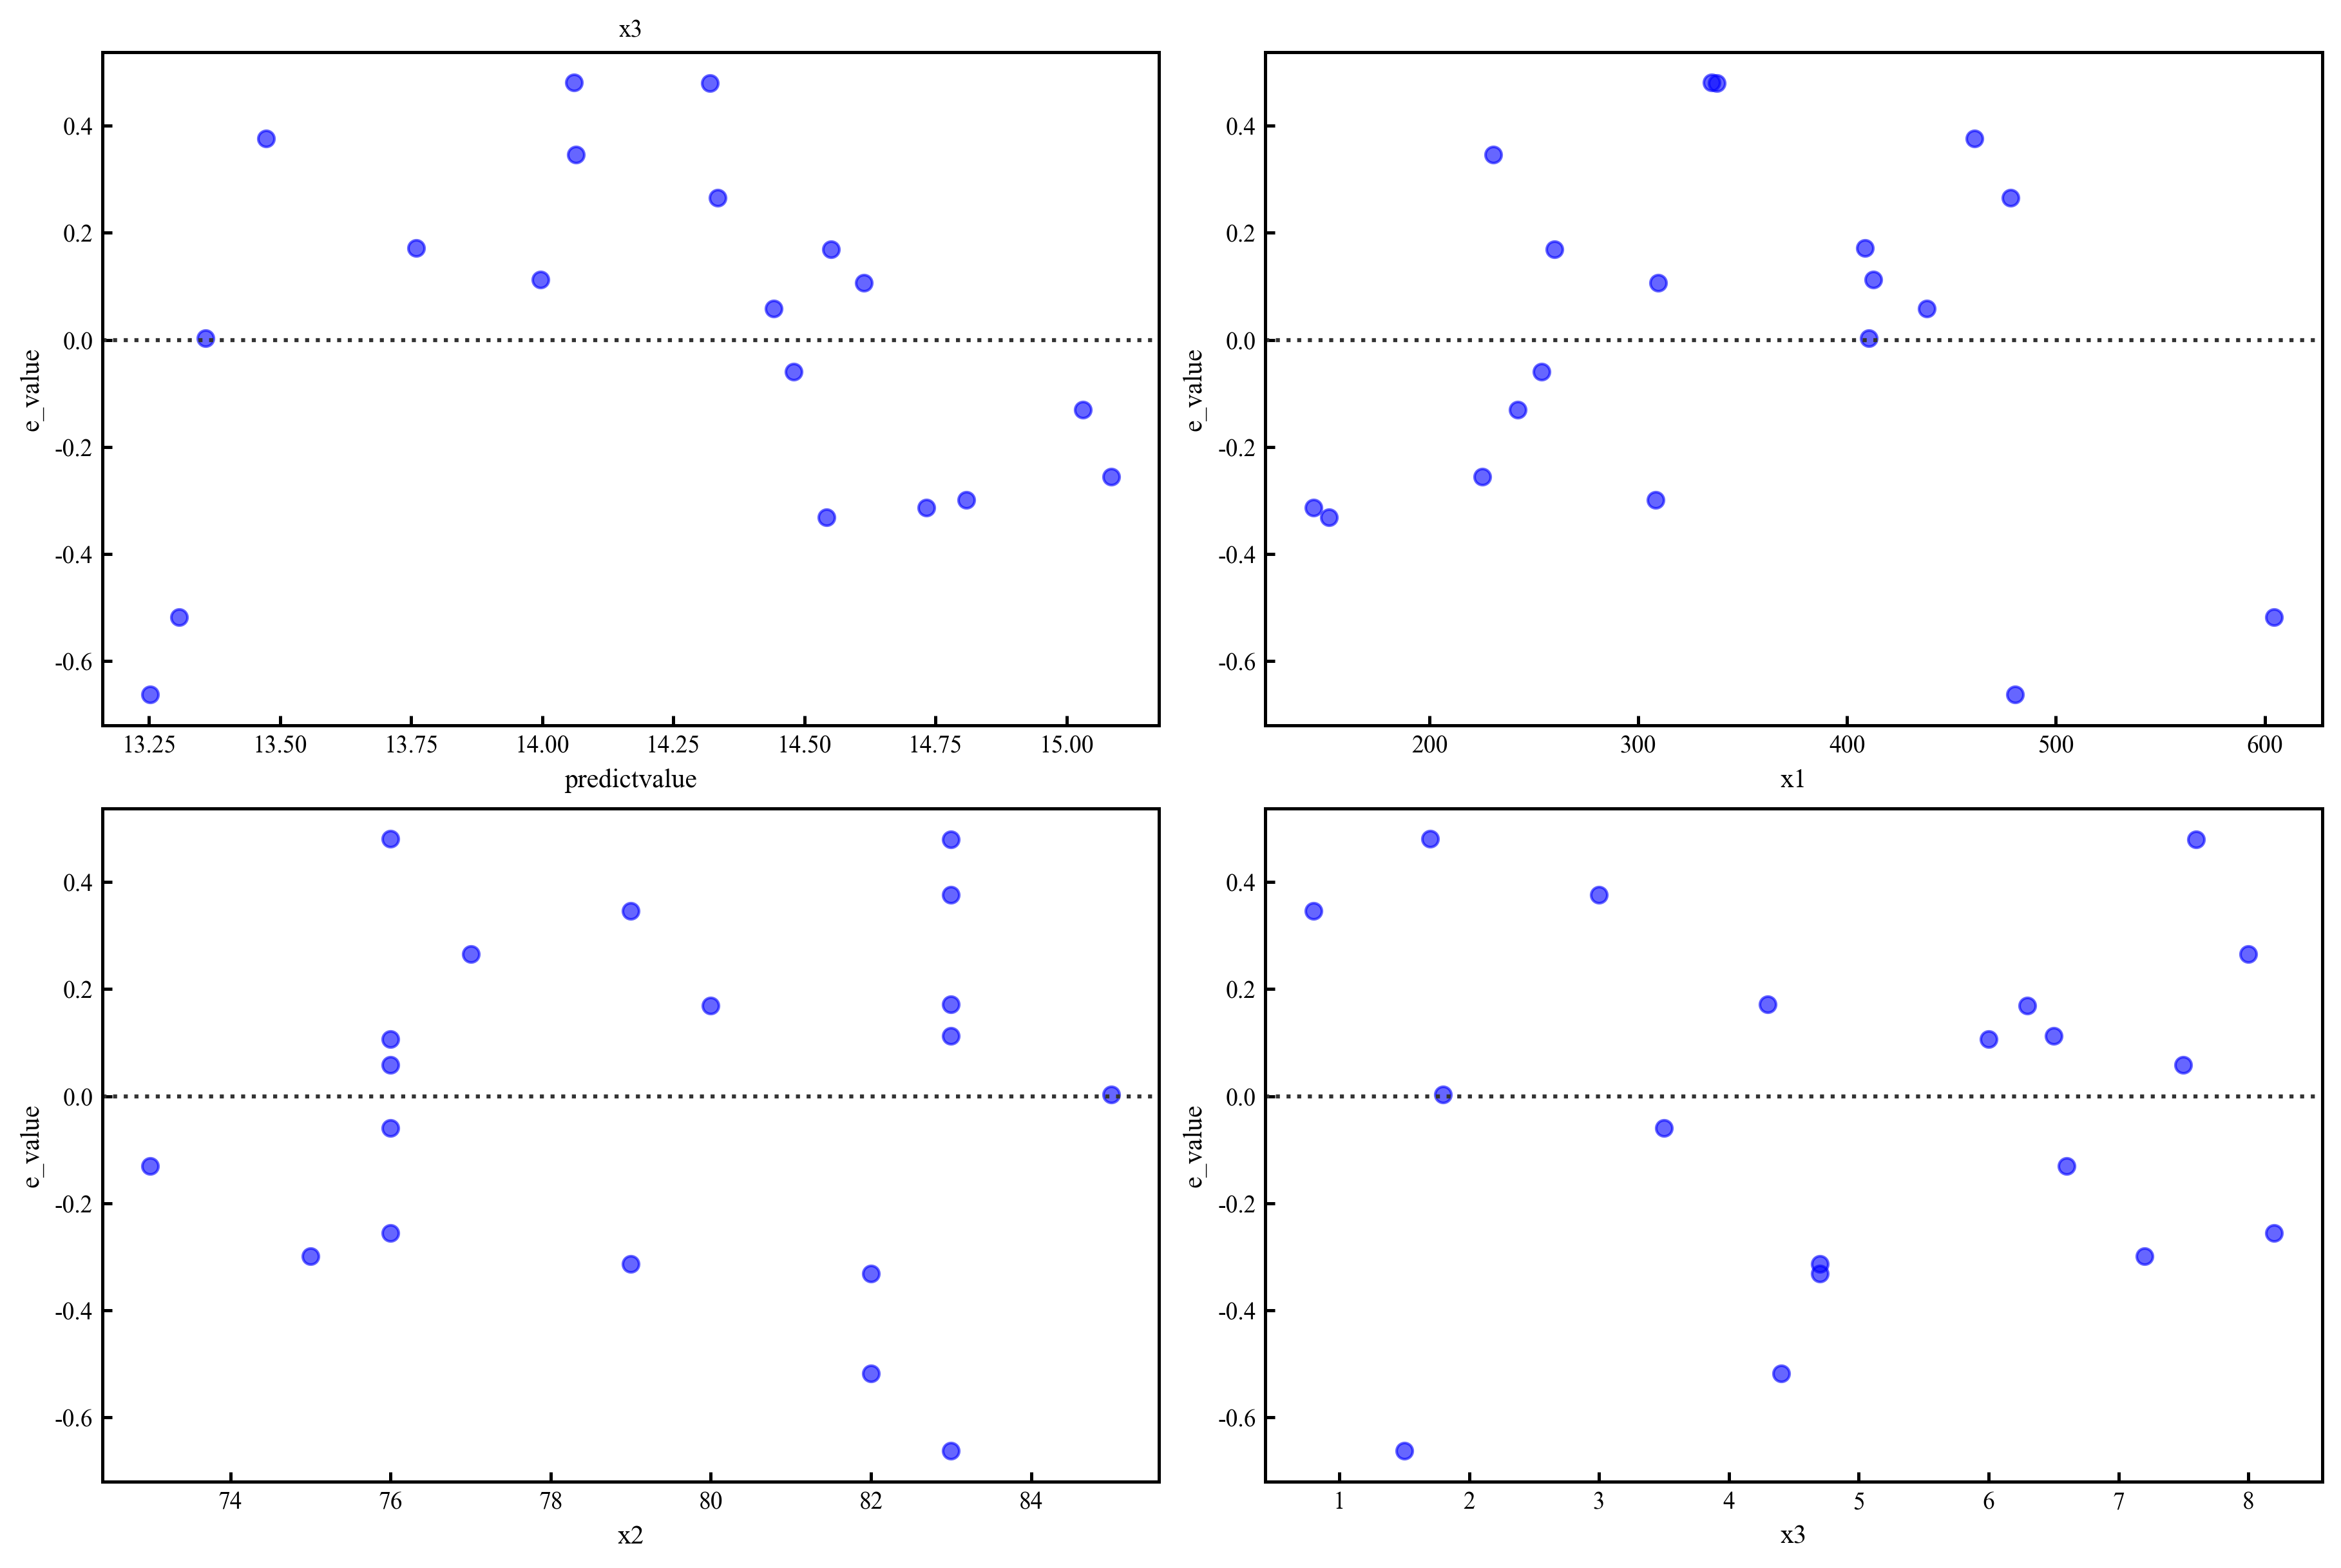

In [6]:
sugercane['predictvalue'] = model1.fittedvalues
sugercane['e_value'] = model1.resid
# 绘制残差图
fig,ax = plt.subplots(2,2,figsize=(12, 8), layout='constrained')
def myplot(l,a,b):
    sns.residplot(x=l,
                y="e_value",
                ax=ax[a,b],
                data=sugercane[[l,'e_value']], 
                scatter_kws={"color": "blue", "alpha": 0.6},
                line_kws={"color": "red", "linestyle": "--"})
    # 设置子图标题
    ax[0, 0].set_title(l, fontsize=9)
myplot("predictvalue",0,0)
myplot("x1",0,1)
myplot("x2",1,0)
myplot("x3",1,1)
plt.show()